#     Calculate model bias and plot a timeseries of bias


## Setup imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import notebook_prepare as pre

## Define plotting function

In [6]:
def statistics(df,plotdir,key,label,resample_time,avg_method,min_method,max_method) :

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    time_data     = pd.to_datetime(df.index)
    aircraft_data = df['Aircraft'][:].tolist()
    model_data    = df['Model'][:].tolist()

    # Calculate the bias.
    bias = [x-y for x,y in zip(model_data,aircraft_data)]
    mean_bias = str("{:.2f}".format(np.nanmean(bias)))

    # Resample the data.
    new_df = pd.DataFrame()
    new_df['Bias'] = pd.Series(bias,index=time_data)
    if avg_method == 'mean' :
        avg_df = new_df.resample(resample_time).mean()
    if avg_method == 'median' :
        avg_df = new_df.resample(resample_time).median()
    min_df = new_df.resample(resample_time).quantile(min_method)
    max_df = new_df.resample(resample_time).quantile(max_method)

    # Define the data to plot.
    time_data = avg_df.index
    avg_data  = avg_df['Bias'][:].tolist()
    min_data  = min_df['Bias'][:].tolist()
    max_data  = max_df['Bias'][:].tolist()

    # Plot the data.
    plt.plot(time_data,avg_data,lw=5,c='cadetblue')
    plt.fill_between(time_data,min_data,max_data,fc='cadetblue',ec=None,alpha=0.5)

    # Set the axes labels.
    plt.xlabel('Time / UTC',fontsize=50,labelpad=10)
    plt.ylabel('Model Bias '+label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    time_ticks,time_labels = pre.calculate_time_markers(time_data)
    plt.xticks(time_ticks,rotation=45)
    ax.set_xticklabels(time_labels)
    ax.tick_params(labelsize=30)

    # Add the mean bias as a title.
    plt.title('Mean Bias = '+mean_bias,fontsize=40,y=1.05)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Timeseries_Of_Bias.png')
    #plt.close()

## Specify the flight number

In [7]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M296'  

## Prepare the data and plot for each pollution species

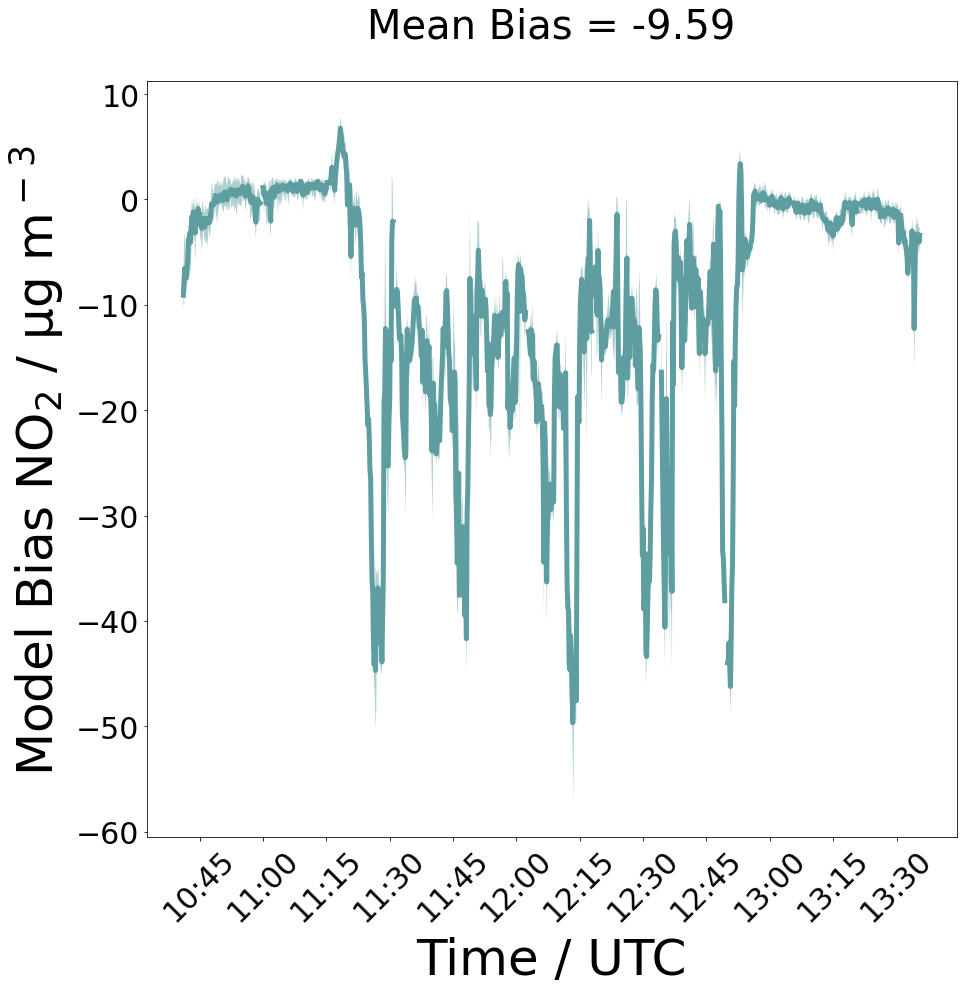

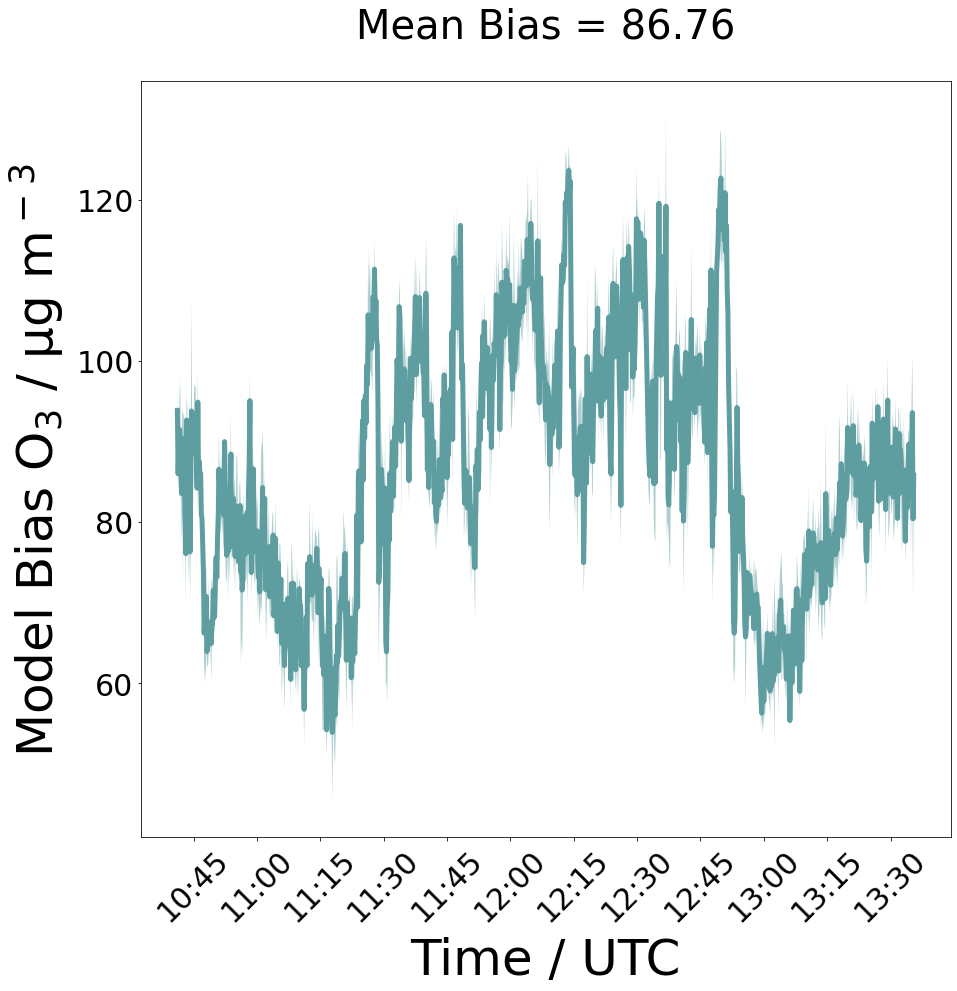

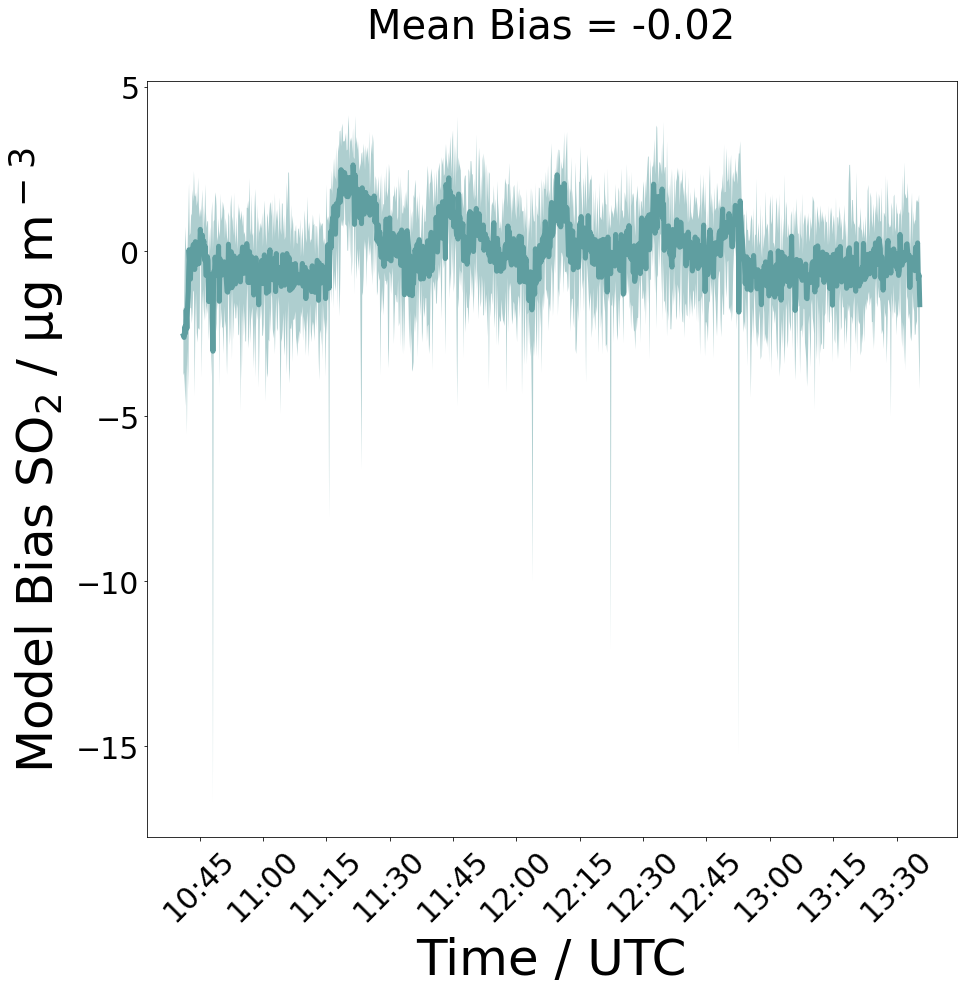

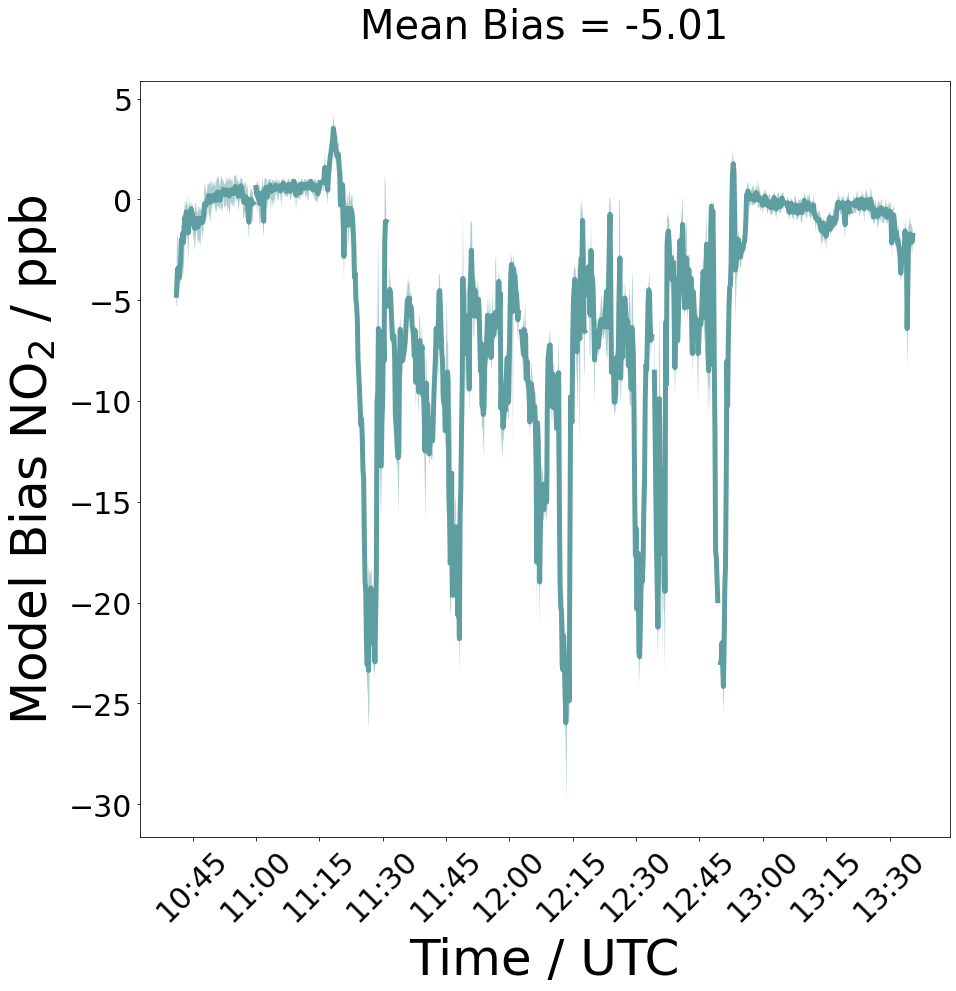

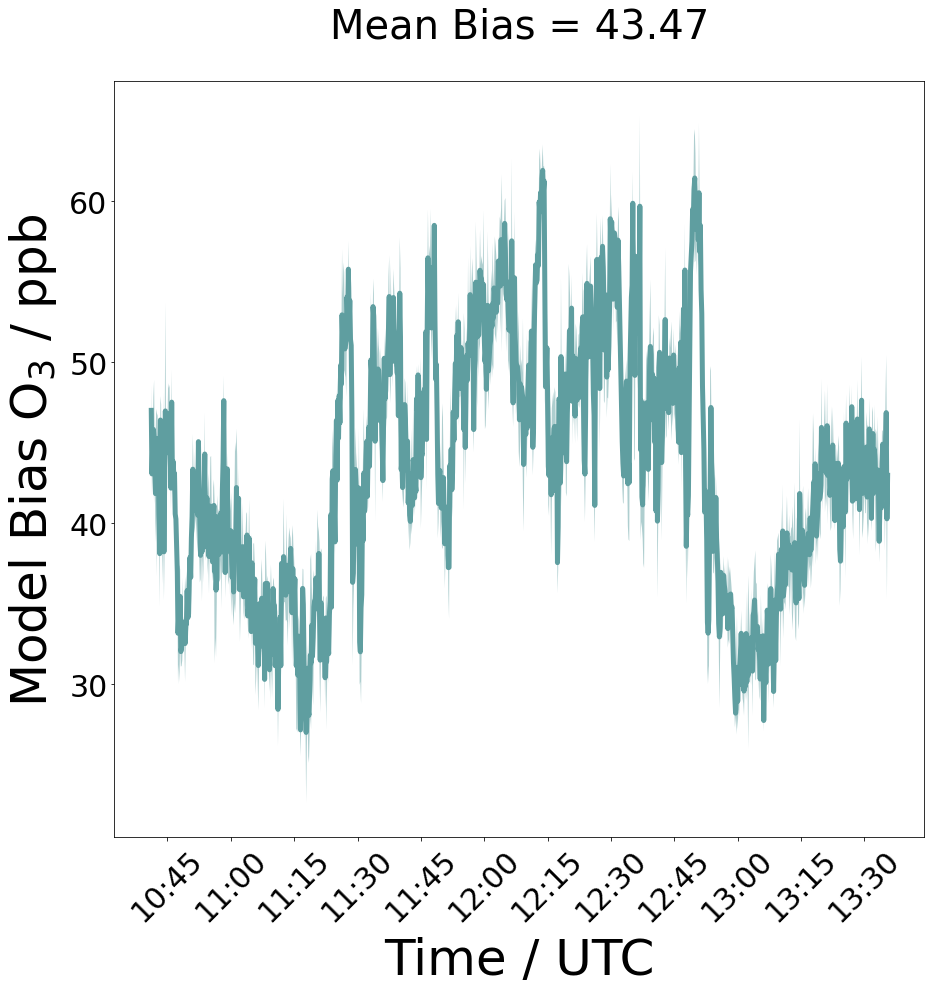

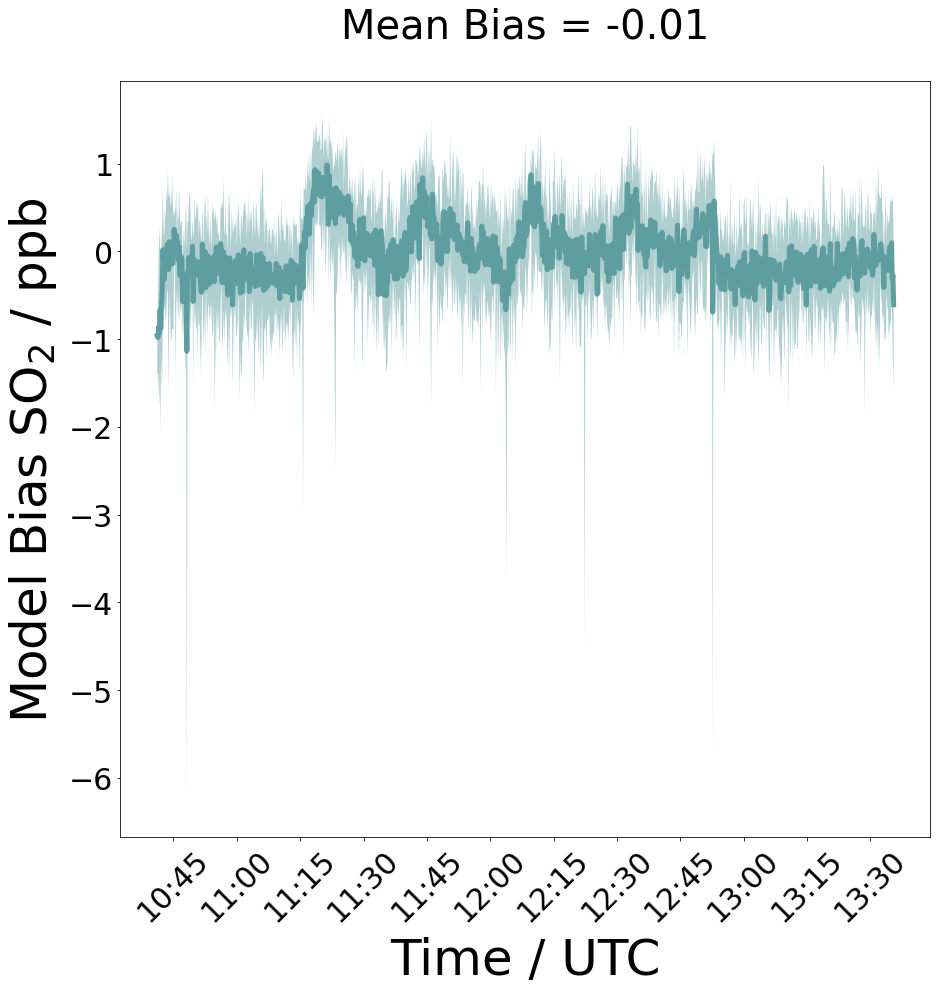

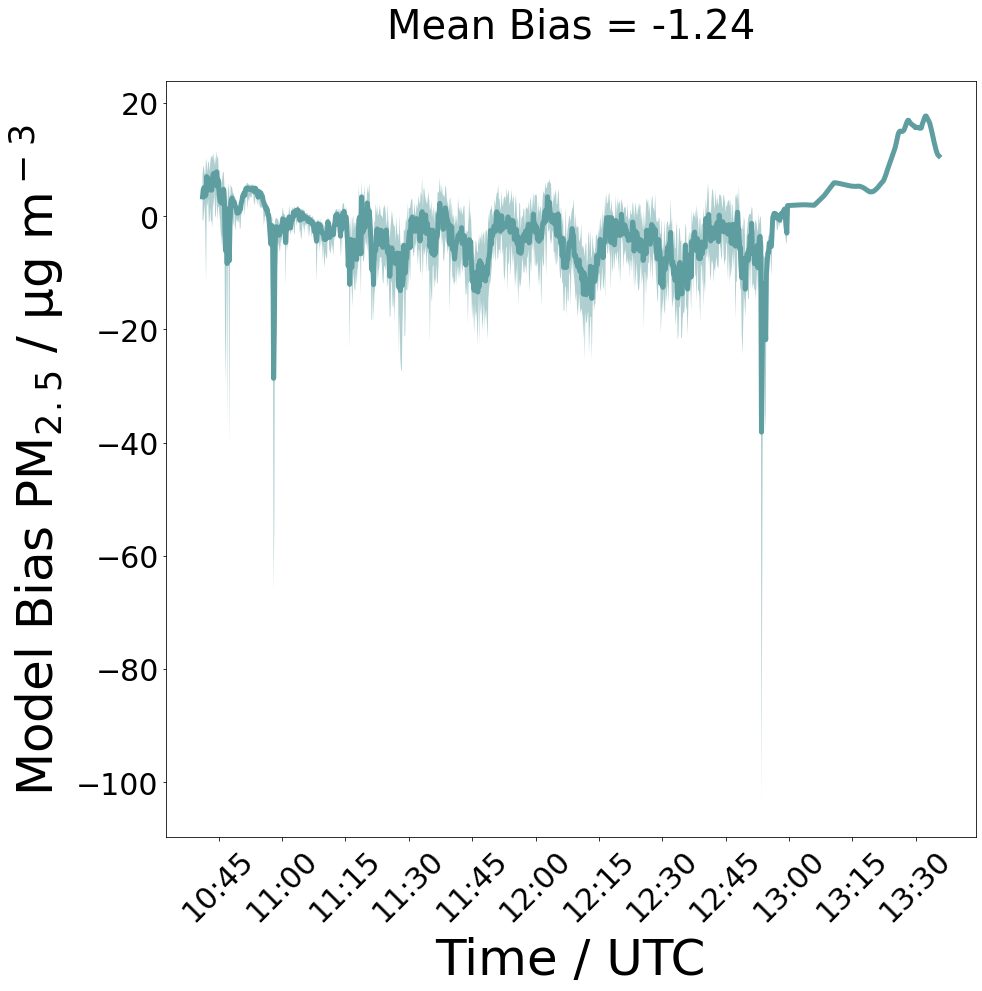

In [8]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number,True)
optns = setup[4]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)
    
    statistics(df,setup[5],key,label,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'])